### Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random
import numpy as np
from ipywidgets import interact

### Import data

In [31]:
PATH = 'C:/Users/admin/Desktop/python/COVID_in_India/data/covid19-india-statewise-timeseries.csv'
df = pd.read_csv(PATH)

### Show sample data

In [32]:
df.head(10)

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,30-01-2020,Kerala,1,NaN,NaN
1,02-02-2020,Kerala,2,NaN,NaN
2,03-02-2020,Kerala,3,NaN,NaN
3,02-03-2020,Kerala,3,NaN,NaN
4,02-03-2020,Delhi,1,NaN,NaN
5,02-03-2020,Telangana,1,NaN,NaN
6,03-03-2020,Kerala,3,NaN,NaN
7,03-03-2020,Delhi,1,NaN,NaN
8,03-03-2020,Telangana,1,NaN,NaN
9,03-03-2020,Rajasthan,1,NaN,NaN


In [33]:
df.describe()

,Total Confirmed Cases,Cured/Discharged/Migrated,Death
count,5182.000000,4837.000000,4837.000000
mean,15311.899074,10396.877610,393.895390
std,47503.892886,32537.928452,1509.165276
min,0.000000,0.000000,0.000000
25%,49.000000,31.000000,1.000000
50%,930.000000,493.000000,9.000000
75%,7344.500000,4842.000000,133.000000
max,584754.000000,408286.000000,19749.000000


### Basic operations on a data

In [34]:
#replacing Nan with 0
df = df.fillna(0)

#converting strings in Date to datetime format 
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.head(10)

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,2020-01-30,Kerala,1,0.0,0.0
1,2020-02-02,Kerala,2,0.0,0.0
2,2020-02-03,Kerala,3,0.0,0.0
3,2020-03-02,Kerala,3,0.0,0.0
4,2020-03-02,Delhi,1,0.0,0.0
5,2020-03-02,Telangana,1,0.0,0.0
6,2020-03-03,Kerala,3,0.0,0.0
7,2020-03-03,Delhi,1,0.0,0.0
8,2020-03-03,Telangana,1,0.0,0.0
9,2020-03-03,Rajasthan,1,0.0,0.0


In [35]:
def reset_data(path=PATH):
    '''Reloading data frame. Function is designed for interactive plots'''
    df = pd.read_csv(path)
    df = df.fillna(0)
    df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
    return df

### Getting to know the data

In [36]:
#display the states of India
state_col = df.State
states = list(state_col.value_counts().keys())

print('States: {}'.format(states))
print('Number of states: {}'.format(len(states)))

States: ['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Tamil Nadu', 'Andhra Pradesh', 'Ladakh', 'Bihar', 'Jammu and Kashmir', 'Punjab', 'Maharashtra', 'Karnataka', 'Chhattisgarh', 'Uttarakhand', 'Odisha', 'Chandigarh', 'Himachal Pradesh', 'Madhya Pradesh', 'West Bengal', 'Puducherry', 'Gujarat', 'Manipur', 'Mizoram', 'Goa', 'Andaman and Nicobar Islands', 'Jharkhand', 'Assam', 'Arunachal Pradesh', 'Tripura', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim']
Number of states: 35


In [37]:
#check the range of dates
first_day = df.Date[0]
print('1st day: {}'.format(first_day))

last_index = len(df.Date) - 1 
last_day = df.Date[last_index]
print('last day: {}'.format(last_day))

unique_days = set(df.Date)
print('Number of unique days: {}'.format(len(unique_days)))

1st day: 2020-01-30 00:00:00
last day: 2020-08-16 00:00:00
Number of unique days: 171


### Plot chart of cases, cures and deaths by days

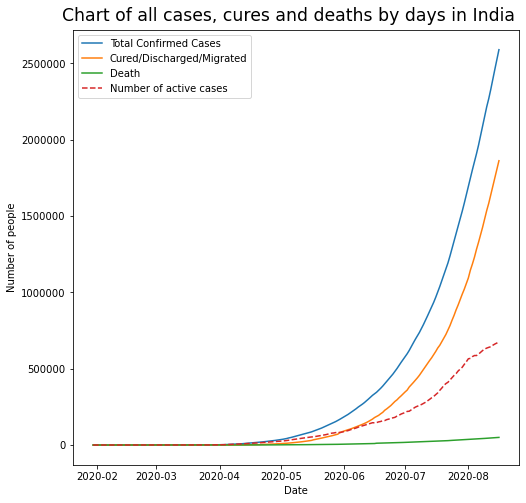

In [38]:
#gathering cumulative data
conf_cases = {}
cured = {}
dead = {}
column_names = list(df.columns[2:])

for day in unique_days:
    day_properties = df[df.Date == day]
    conf_cases[day] = sum(day_properties[column_names[0]])
    cured[day] = sum(day_properties[column_names[1]])
    dead[day] = sum(day_properties[column_names[2]])
    
data_to_plot = [conf_cases, cured, dead]

def create_cumulative_df(data_list):
    output = []
    for i, data in enumerate(data_to_plot):
        dates = list(data.keys())
        data_df = pd.DataFrame.from_dict({
            'Date' : dates, 
            'Num' : [data[date] for date in dates]})
        data_df.sort_values(by='Date',inplace=True)
        output.append(data_df)
    return output

[conf_cases, cured, dead] = create_cumulative_df(data_to_plot)

#count active cases
num_of_act_cases = conf_cases.Num - (cured.Num + dead.Num)

#plotting data
fig = plt.figure(figsize=(8,8))
plt.suptitle('Chart of all cases, cures and deaths by days in India', y=0.92, size='xx-large')

for i, data_df in enumerate([conf_cases, cured, dead]):
    plt.plot(data_df.Date, data_df.Num, label=column_names[i])

plt.plot(conf_cases.Date, num_of_act_cases, label='Number of active cases', linestyle="--")
plt.xlabel('Date')
plt.ylabel('Number of people')
fig.axes[0].yaxis.get_major_formatter().set_scientific(False)  #turn off scientific notation
plt.legend()
plt.show()

### Plots of total number of cases in each state individually

#### Raw version

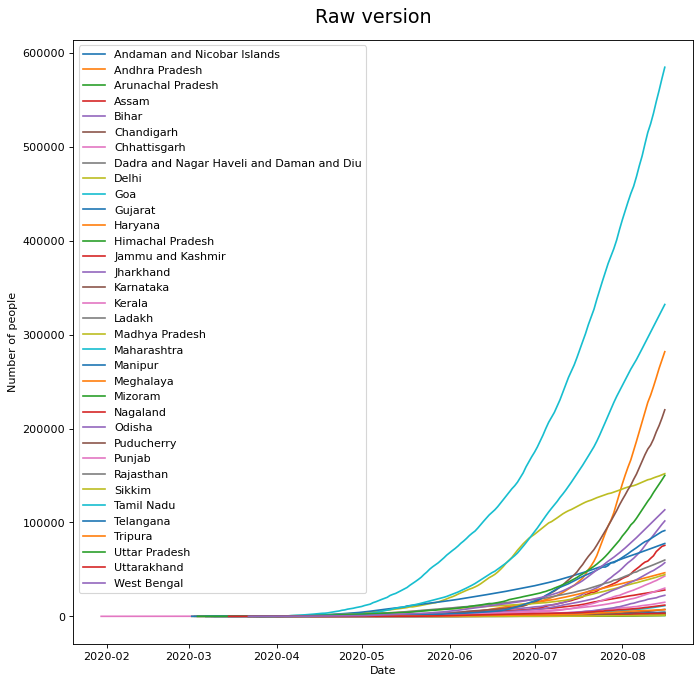

In [39]:
# Preparing data
df.sort_values(by=['State','Date'],ascending=[True,True],inplace=True)

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi= 80)
plt.suptitle('Raw version', y=0.92, size='xx-large')

for state_name, df_state in df.groupby(['State']):
    x = df_state['Date']
    y = df_state['Total Confirmed Cases'] 
    plt.plot(x,y,label=state_name)
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.legend()
fig.axes[0].yaxis.get_major_formatter().set_scientific(False)  #turn off scientific notation
plt.show()

#### Highligted state which is typed manually

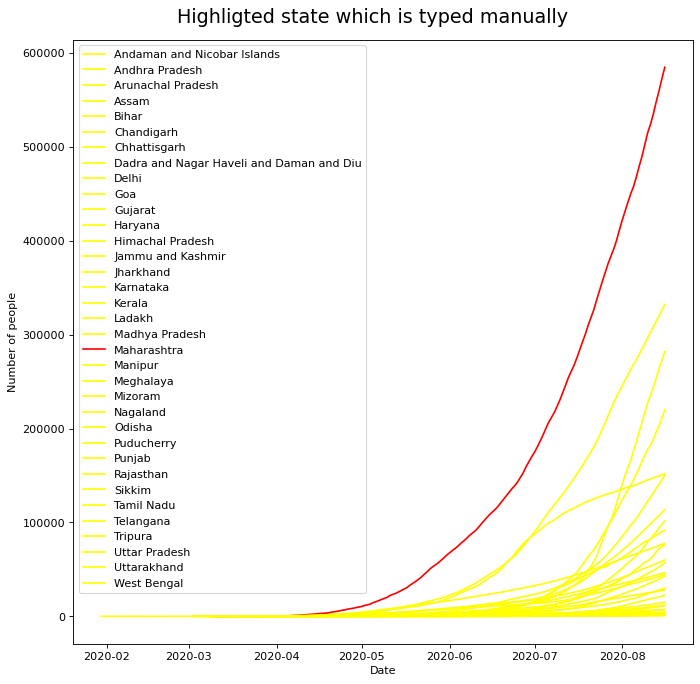

In [40]:
# Name of the state that we are interested in ( will be displayed in different color)
CHOSEN_STATE = 'Maharashtra'

states = df['State'].unique()
if CHOSEN_STATE not in states:
    raise Exception('State does not exist. Try different name from the list: {}'.format(states))
    
# Preparing data
df.sort_values(by=['State','Date'],ascending=[True,True],inplace=True)

# Setting color
chosen = 'red'  
default = 'yellow'  

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi= 80)
plt.suptitle('Highligted state which is typed manually', y=0.92, size='xx-large')

for state_name, df_state in df.groupby(['State']):
    x = df_state['Date']
    y = df_state['Total Confirmed Cases'] 
    if state_name == CHOSEN_STATE:
        c = chosen
    else:
        c = default
    plt.plot(x,y,label=state_name,c=c)
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.legend()
fig.axes[0].yaxis.get_major_formatter().set_scientific(False)  #turn off scientific notation
plt.show()

#### Highligted state - iterative version

In [41]:
def draw_series(chosen_state):
    # Preparing data
    df = reset_data()
    df.sort_values(by=['State','Date'],ascending=[True,True],inplace=True) 
    
    # Setting colors
    chosen = 'red'  
    default = 'yellow'
    
    # Draw Plots
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi= 80)
    plt.suptitle('Highligted state - iterative version',
                 y=0.92, size='xx-large')
    for state_name, df_state in df.groupby(['State']):
        # draw other lines
        x = df_state['Date']
        y = df_state['Total Confirmed Cases']
        if state_name != chosen_state:
            plt.plot(x,y,label=state_name,c=default)
        else:
            x_chosen = df_state['Date']
            y_chosen = df_state['Total Confirmed Cases']
    # draw chosen line
    plt.plot(x_chosen, y_chosen, label=chosen_state, c=chosen)
    # decorations
    plt.xlabel('Date')
    plt.ylabel('Number of people')
    plt.legend()
    fig.axes[0].yaxis.get_major_formatter().set_scientific(False)  #turn off scientific notation
    plt.show()

print('Choose the state:')
interact(draw_series, chosen_state=df['State'].unique())

Choose the state:


interactive(children=(Dropdown(description='chosen_state', options=('Andaman and Nicobar Islands', 'Andhra Pra…

<function __main__.draw_series(chosen_state)>

### Plot of active cases with peaks and troughs in state with worst situation (Maharashtra)

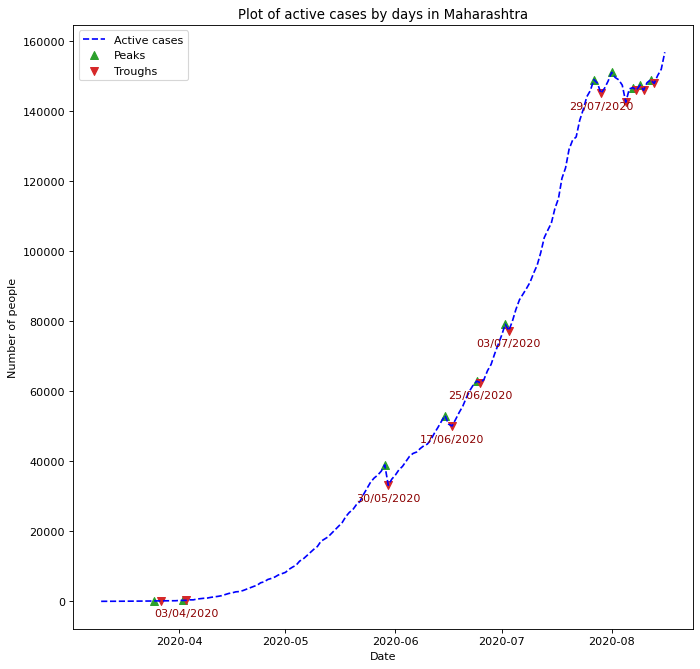

In [112]:
# Preparing data
groups = df.groupby('State')
df_Mahara = groups.get_group('Maharashtra')
y = list(df_Mahara['Total Confirmed Cases'] - (df_Mahara['Cured/Discharged/Migrated'] + df_Mahara['Death']))
x = list(df_Mahara['Date'])

# Get the Peaks and Troughs
doublediff = np.diff(np.sign(np.diff(y)))
peak_locations = list(np.where(doublediff == -2)[0] + 1)
x_peak = [x[i] for i in peak_locations]
y_peak = [y[i] for i in peak_locations]

y_minus = [-1*val for val in y]
doublediff2 = np.diff(np.sign(np.diff(y_minus)))
trough_locations = np.where(doublediff2 == -2)[0] + 1
x_trough = [x[i] for i in trough_locations]
y_trough = [y[i] for i in trough_locations]

# Presenting a plot
plt.figure(figsize=(10,10), dpi= 80)
plt.plot(x,y,linestyle='--',c='blue', label='Active cases')
plt.scatter(x_peak, y_peak, marker='^', color='tab:green', s=50, label='Peaks')
plt.scatter(x_trough, y_trough, marker='v', color='tab:red', s=50, label='Troughs')
plt.title('Plot of active cases by days in Maharashtra')
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.legend()
# Annotations
border_low = 1
border_up = 7
for x, y in zip(x_trough[border_low:border_up], y_trough[border_low:border_up]):
    plt.text(x, y-4500, x.strftime('%d/%m/%Y'), horizontalalignment='center', color='darkred')
plt.show()

### Barcharts to present statistics of cured/discharged/migrated people by days 

In [113]:
## Preparing data
df = pd.read_csv(PATH)  # For better interaction importing the csv file again with dates as strings
df = df.fillna(0)

## Preparing values
states = list(df.State.unique())
cures = list(np.zeros(len(states)))

## Presenting bar plot
def apply_function(row):
    index = states.index(row['State'])
    cured_value = row['Cured/Discharged/Migrated']
    cures[index] = cured_value

def get_cures(date):
    df_cures = df[df.Date == date]
    df_cures.apply(apply_function, axis=1)
    return cures  

def show_barplot(date):
    plt.subplots(1, 1, figsize=(25, 15))
    plt.suptitle('Cured/discharged/migrated people by days - interactive version',
                 y=0.92, size='xx-large')
    values = get_cures(date)
    plt.bar(states, values, width=0.5,edgecolor='black',linewidth=2)
    plt.xticks(rotation=90)
    plt.ylabel('Number of people')
    plt.xlabel('State')
    plt.show()
    
interact(show_barplot, date=(df['Date'].unique()))

interactive(children=(Dropdown(description='date', options=('30-01-2020', '02-02-2020', '03-02-2020', '02-03-2…

<function __main__.show_barplot(date)>

### Stacked Area Chart to present participation of deaths in 5 states with worst epidemic situation

<ipython-input-216-13c80407f90e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.sort_values(by='Date',inplace=True)


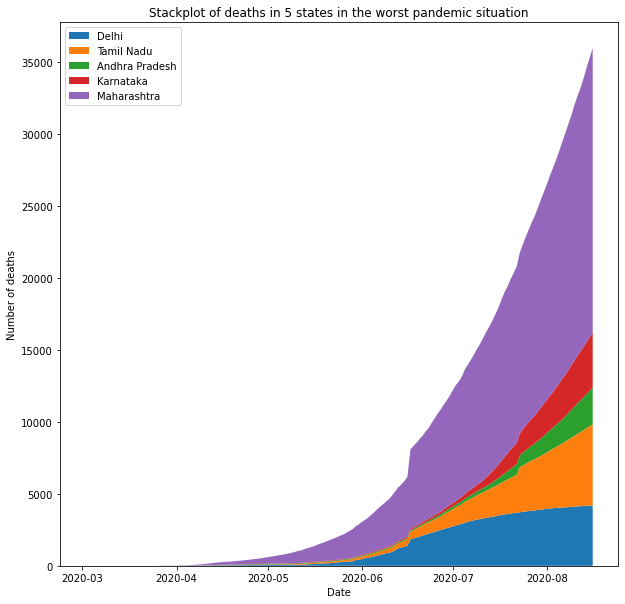

In [216]:
# Prepare data
df = reset_data()
states = ['Delhi', 'Tamil Nadu', 'Andhra Pradesh', 'Karnataka', 'Maharashtra']
groups = df.groupby('State')

# Handling different dates
all_dates = set()
for state in states:
    group = groups.get_group(state)
    date = set(group['Date'])
    all_dates.update(date)
x = sorted(list(all_dates))
    
y_vals = []
for state in states:
    group = groups.get_group(state)
    date = list(group['Date'])
    absent_dates = [d for d in x if d not in date]
    for d in absent_dates:
        temp_dict = {'Date' : d, 
                     'State' : state, 
                     'Total Confirmed Cases' : 0,
                     'Cured/Discharged/Migrated' : 0, 
                     'Death' : 0}
        temp_df = pd.DataFrame(temp_dict,['new'])
        group = group.append(temp_df)
    group.sort_values(by='Date',inplace=True)
    y_vals.append(list(group.Death))
    
plt.figure(figsize=(10,10))
plt.title('Stackplot of deaths in 5 states in the worst pandemic situation')
plt.stackplot(x,y_vals,labels=states)
plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.legend(loc=2)
plt.show()